## Load dataset

In [458]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [459]:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Investigate the dataset

In [460]:
df.drop('id',axis = 1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [461]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Some varialbes are wrongly labeled as numeric.

- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- stroke: 1 if the patient had a stroke or 0 if not

In [462]:
#investigate gender column
print(df["gender"].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [463]:
#investigate the specific row with no gender
df[df["gender"] == "Other"]

#is part of the non_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [464]:
df = df.drop(df[df["gender"] == "Other"].index)
print(df["gender"].value_counts())

Female    2994
Male      2115
Name: gender, dtype: int64


In [465]:
#investigate ever_married
print(df["ever_married"].value_counts())

Yes    3353
No     1756
Name: ever_married, dtype: int64


In [466]:
#investigate work type
print(df["work_type"].value_counts())

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [467]:
#investigate residence type
print(df["Residence_type"].value_counts())

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


In [468]:
#investigate smoking status
print(df["smoking_status"].value_counts())

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


## Visualisations

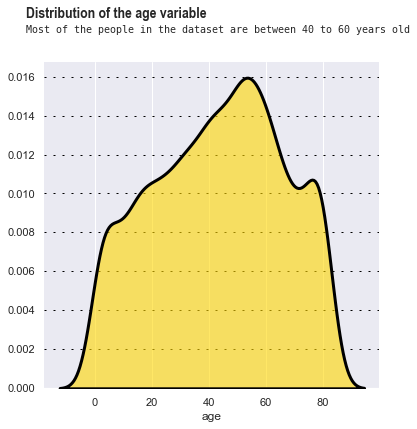

In [469]:
#Distribution of age variable
f, ax = plt.subplots(figsize=(6,6))

#text
ax.text(-24,0.019,'Distribution of the age variable',fontsize=15,fontweight='bold', fontfamily='Arial Narrow')
ax.text(-24,0.01826,'Most of the people in the dataset are between 40 to 60 years old',fontsize=10,fontweight='light', fontfamily='monospace')

#plot and configurations
sns.kdeplot(x= df["age"], shade=True, color="gold", alpha= 0.6, zorder= 3, linewidth= 3, edgecolor= "black")
ax.set_ylabel("")
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
ax.spines[["top", "right", "left"]].set_visible(False)


# most of the people in the df are between 40 to 60 years old

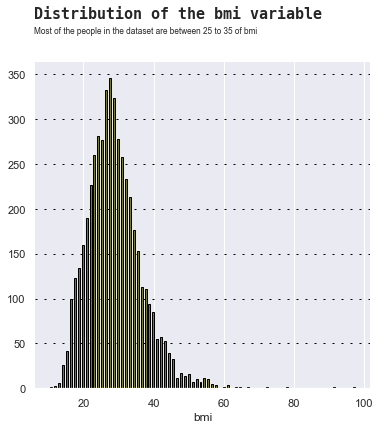

In [470]:
#Distribution of age variable
f, ax = plt.subplots(figsize=(6,6))

#text
ax.text(6, 412,'Distribution of the bmi variable',fontsize=15,fontweight='bold', fontfamily='monospace')
ax.text(6, 395,'Most of the people in the dataset are between 25 to 35 of bmi',fontsize=10,fontweight='light', fontfamily='Arial Narrow')


#Distribution of age variable
sns.histplot(x= df["bmi"], color='olive', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.5)
ax.set_ylabel("")
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
ax.spines[["top", "right", "left"]].set_visible(False)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Bmi median-transformed'}, xlabel='bmi', ylabel='Density'>

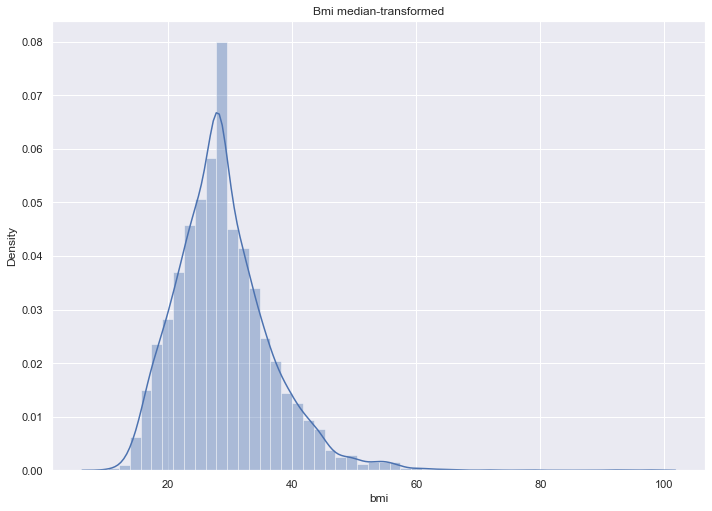

In [471]:
#transform bmi values to log values
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

plt.title("Bmi median-transformed")
sns.distplot(df.bmi)

Distribution is right skewed
most of the people in the dataset are between 25 to 35 of bmi

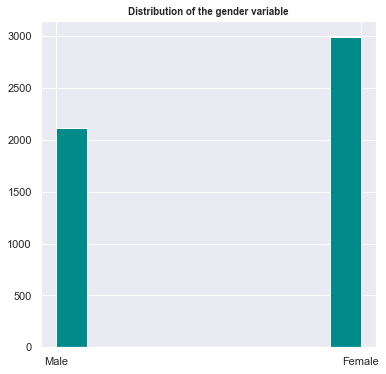

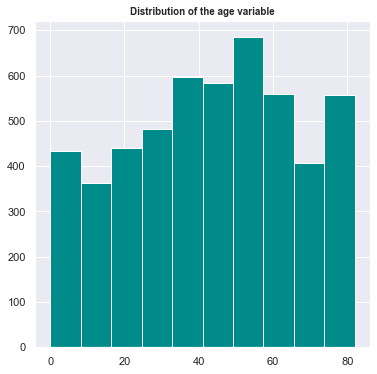

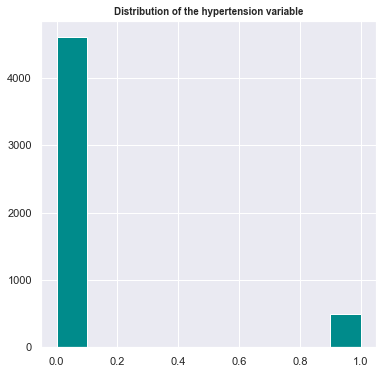

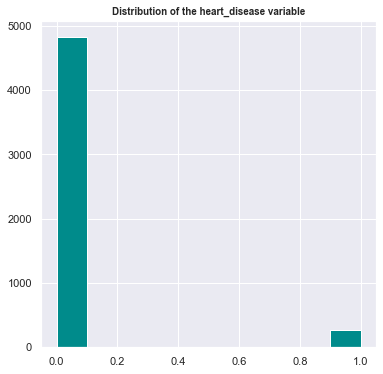

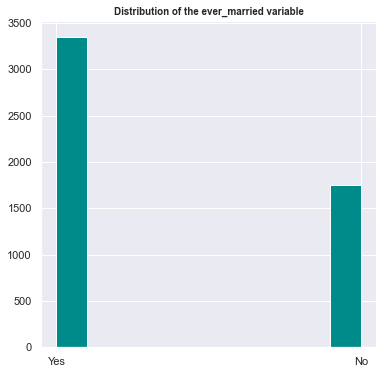

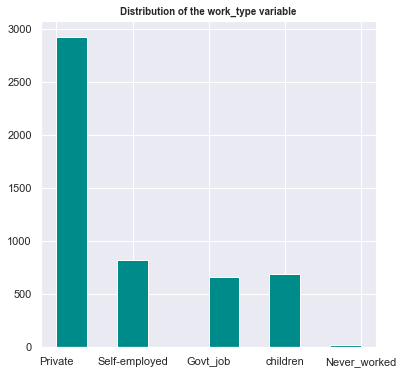

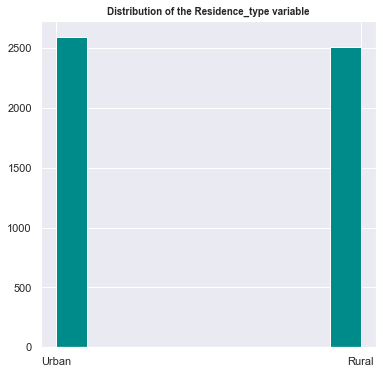

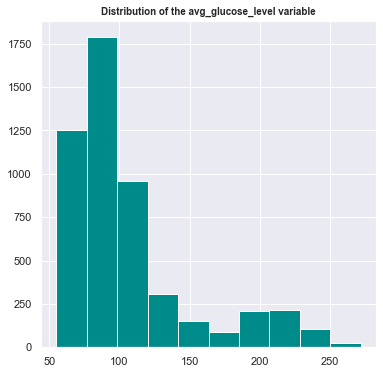

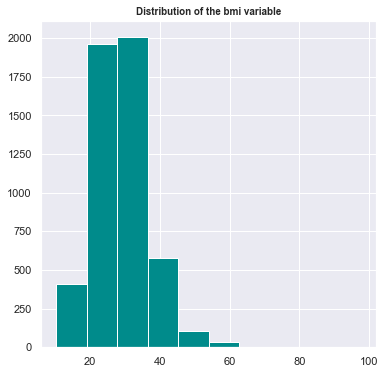

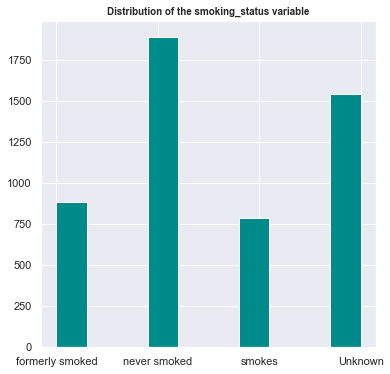

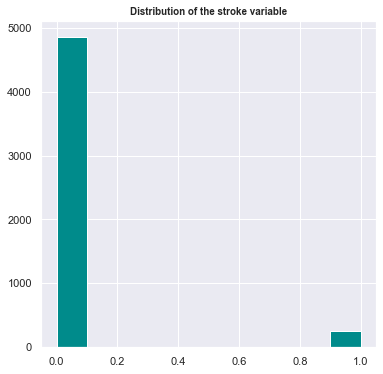

In [472]:
for i in df.columns:

    plt.rcParams["figure.figsize"] = (6,6)
#text
    plt.title('Distribution of the {} variable'.format(i) ,fontsize=12,fontweight='bold', fontfamily='Arial Narrow')
#Distribution of age variable
    plt.hist(x= df[i], alpha=1, color="darkcyan")
    plt.show()


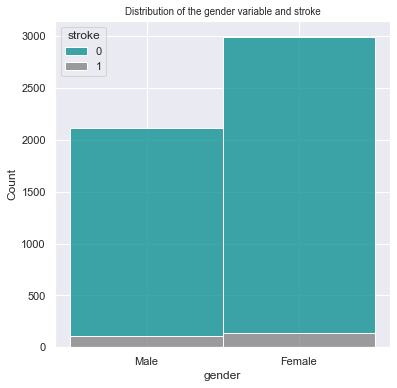

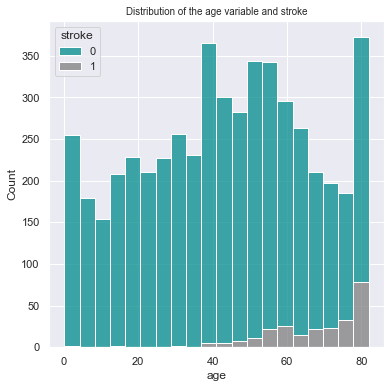

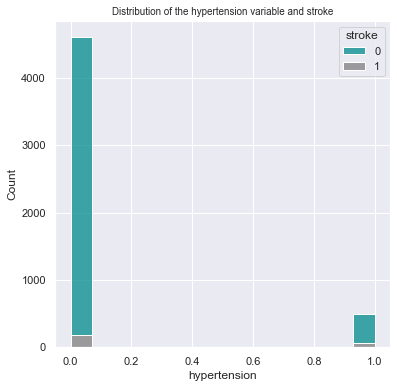

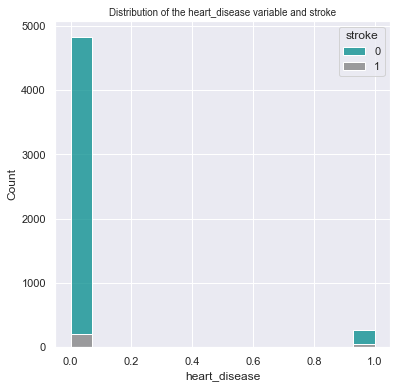

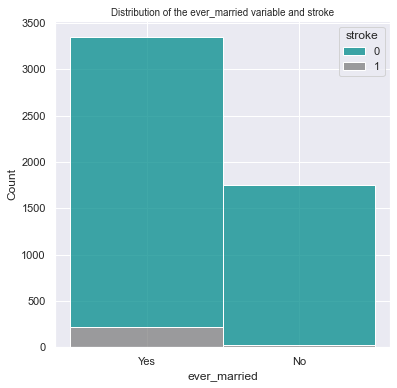

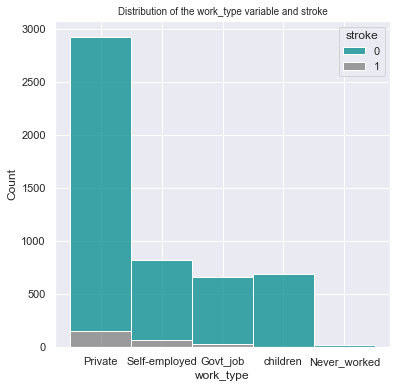

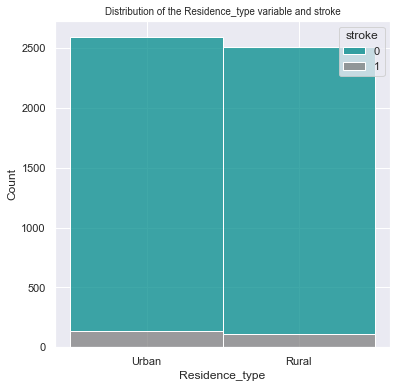

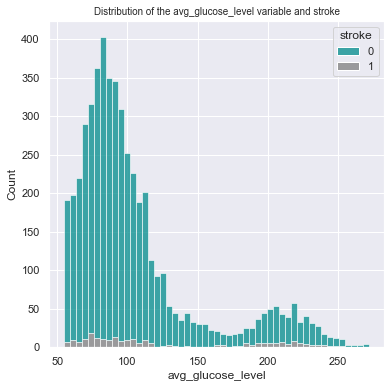

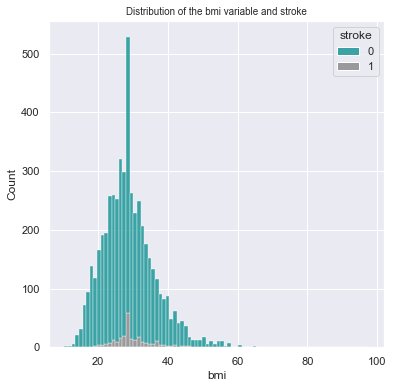

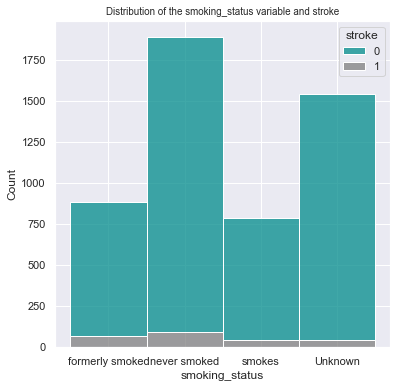

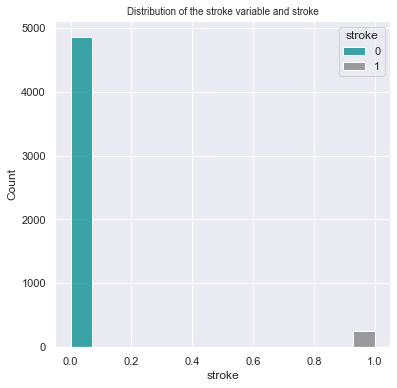

In [473]:
palette2=["darkcyan","grey"]

for i in df.columns:
    plt.rcParams["figure.figsize"] = (6,6)
    plt.title("Distribution of the {} variable and stroke".format(i), fontfamily='Arial Narrow')
    sns.histplot(data= df, x=i, hue= "stroke", stat= "count", palette=palette2, multiple="stack")
    plt.show()


#### Split data

In [474]:
## Split data
from sklearn.model_selection import train_test_split

X = df.drop(columns=["stroke"])
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

## Data Transformation

In [475]:
#change to category type
#categories = ["gender", "smoking_status", "Residence_type", "work_type"]

#for col in categories:
    #X_train[col] = X_train[col].astype("category")

#### Label Encoder for values yes/no

In [476]:
#change yes/no to numbers
from sklearn.preprocessing import LabelEncoder

#create encoder
enconder = LabelEncoder()
columns =  "gender", "hypertension", "heart_disease", "ever_married", "Residence_type"

#create new variable with assigned numbers
for col in columns:
    X_train[col] = enconder.fit_transform(X_train[col])


#check data again
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4783,1,9.0,0,0,0,children,1,66.11,16.3,Unknown
739,0,55.0,0,0,1,Private,1,55.34,27.1,smokes
623,0,74.0,0,0,1,Private,0,68.34,39.3,Unknown
1165,0,32.0,0,0,1,Private,0,80.28,43.7,never smoked
1792,0,24.0,0,0,0,Private,0,72.06,30.2,formerly smoked


#### One-hot for values with more than 1 category

In [477]:
columns = ['work_type', 'smoking_status']

X_train = pd.get_dummies(X_train, columns= columns, prefix = columns)
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4783,1,9.0,0,0,0,1,66.11,16.3,0,0,0,0,1,1,0,0,0
739,0,55.0,0,0,1,1,55.34,27.1,0,0,1,0,0,0,0,0,1
623,0,74.0,0,0,1,0,68.34,39.3,0,0,1,0,0,1,0,0,0
1165,0,32.0,0,0,1,0,80.28,43.7,0,0,1,0,0,0,0,1,0
1792,0,24.0,0,0,0,0,72.06,30.2,0,0,1,0,0,0,1,0,0


#### Standard Scaler

In [478]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


col_names = ["age", "avg_glucose_level", "bmi"]
features = X_train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_train[col_names] = features
X_train.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4783,1,-1.507833,0,0,0,1,-0.885372,-1.648607,0,0,0,0,1,1,0,0,0
739,0,0.526978,0,0,1,1,-1.123817,-0.226304,0,0,1,0,0,0,0,0,1
623,0,1.367443,0,0,1,0,-0.836000,1.380371,0,0,1,0,0,1,0,0,0
1165,0,-0.490427,0,0,1,0,-0.571652,1.959827,0,0,1,0,0,0,0,1,0
1792,0,-0.844308,0,0,0,0,-0.753640,0.181949,0,0,1,0,0,0,1,0,0


## Feature Selection

### Correlation 

<AxesSubplot:>

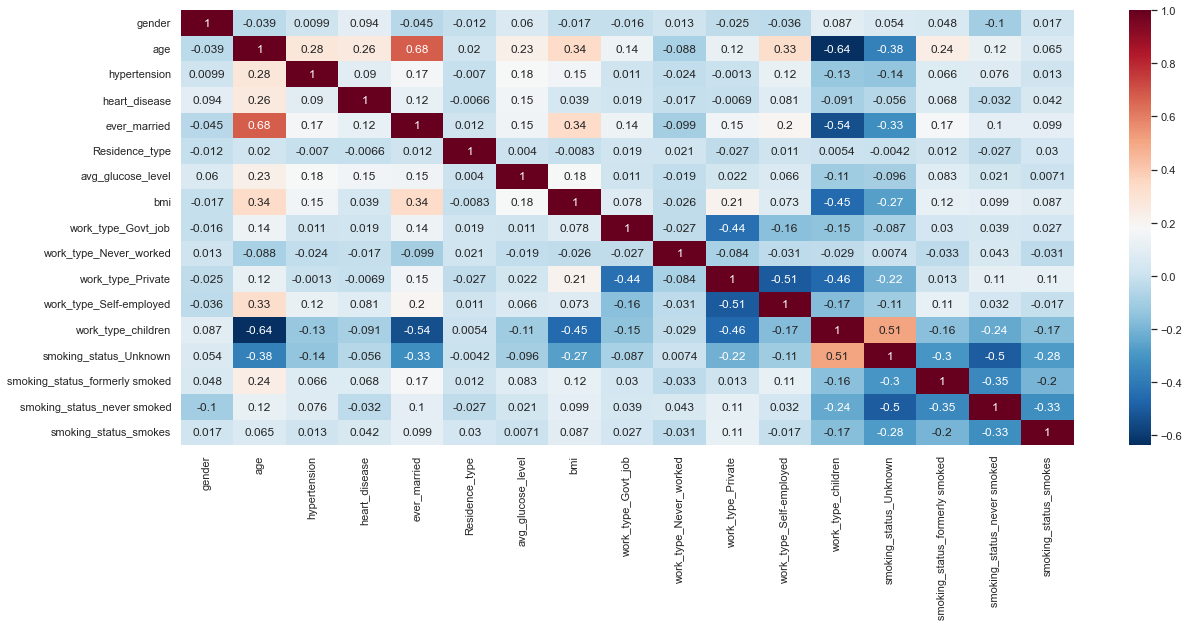

In [479]:
plt.rcParams["figure.figsize"] = (20,8)

#pearson is default
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix,annot = True, cmap = "RdBu_r")

In [480]:
#loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):

        #print variables with high correlation
        if abs(corr_matrix.iloc[i,j]) >0.5:
            print(corr_matrix.columns[i],

corr_matrix.columns[j], corr_matrix.iloc[i,j])


ever_married age 0.6773160028882452
work_type_Self-employed work_type_Private -0.5050203140083895
work_type_children age -0.6383351029284392
work_type_children ever_married -0.5415285181337681
smoking_status_Unknown work_type_children 0.5116106832287693
smoking_status_never smoked smoking_status_Unknown -0.5012342235479682


'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private'


smoking_status_Unknown, work_type_children

In [481]:
#use f-statistics for highyl correlated predictors
from sklearn.feature_selection import f_regression

print(f_regression(X_train, y_train))

(array([1.81496850e-01, 2.71792648e+02, 6.21087910e+01, 7.96035064e+01,
       4.27991137e+01, 1.15168549e+00, 7.28537650e+01, 8.52328763e+00,
       5.06421837e-01, 1.05469772e+00, 3.81995444e-01, 1.30387202e+01,
       2.72026395e+01, 1.13567014e+01, 1.95867297e+01, 5.81856958e-08,
       1.30321462e-01]), array([6.70113961e-01, 4.78203312e-59, 4.20302409e-15, 6.95296015e-19,
       6.86825818e-11, 2.83264224e-01, 1.98444019e-17, 3.52675643e-03,
       4.76735283e-01, 3.04492507e-01, 5.36573997e-01, 3.09027009e-04,
       1.92905481e-07, 7.59201967e-04, 9.88118765e-06, 9.99807549e-01,
       7.18118884e-01]))


#### Sequential Forward Selection

('gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private')
0.950404594100757


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


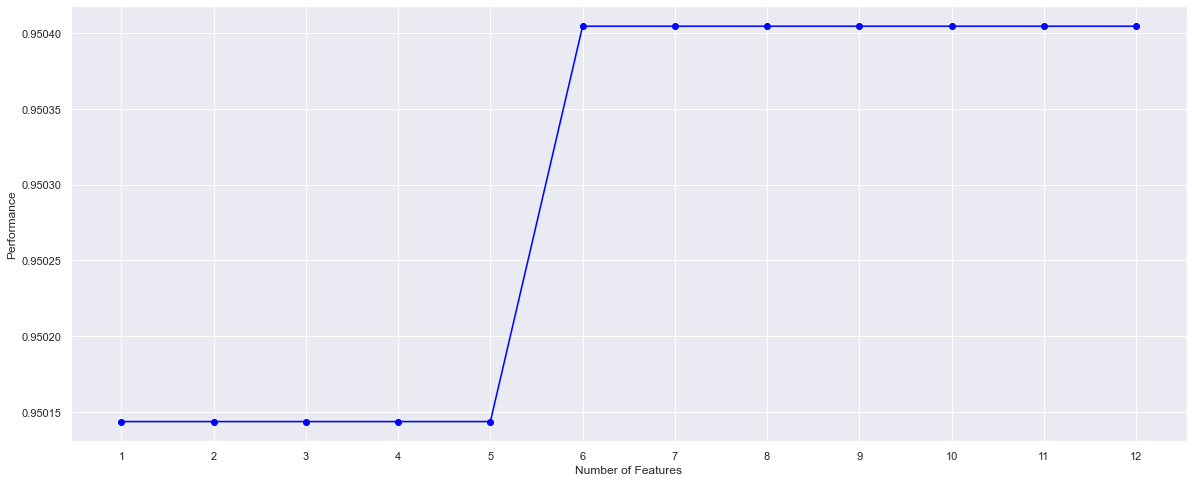

In [482]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = LogisticRegression(max_iter=1000)

sfs = SFS(lr, k_features= 12,
forward= True,
floating= True,
scoring="accuracy", cv=0)

sfs.fit(X_train, y_train)

print(sfs.subsets_[10]["feature_names"])
print(sfs.subsets_[10]["avg_score"])

plot_sfs(sfs.get_metric_dict())
plt.show()

#### Sequential Backward Floating Selection

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


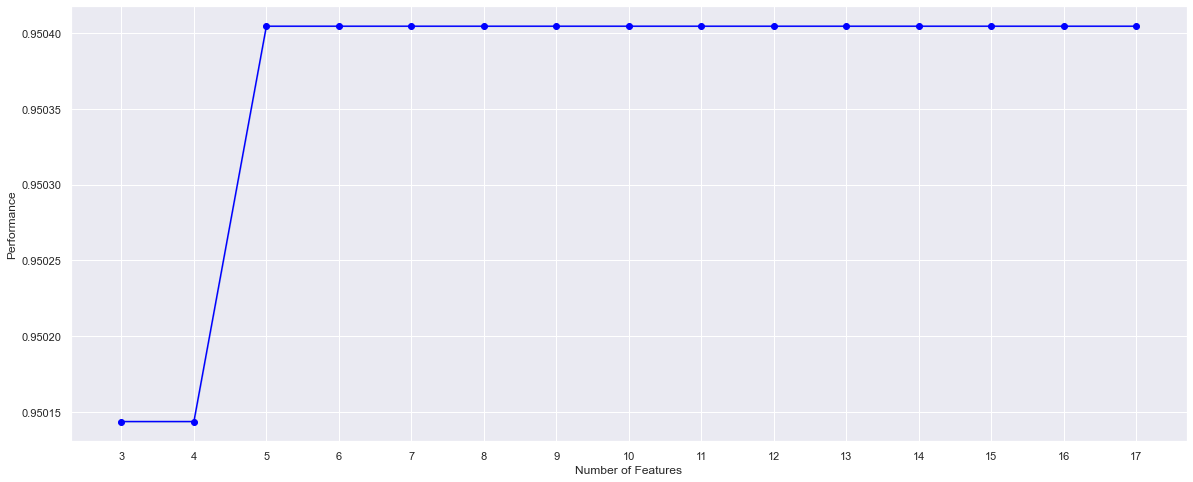

In [483]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = LogisticRegression(max_iter=1000)

sbfs = SFS(lr, k_features= 3,
forward=False,
floating=True,
scoring="accuracy", cv=0)

sbfs.fit(X_train, y_train)
plot_sfs(sbfs.get_metric_dict())
plt.show()

In [484]:
print(sbfs.subsets_[6]["feature_names"])
print(sbfs.subsets_[6]["avg_score"])


('gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type_Self-employed')
0.950404594100757


#####  Recursive Feature Elimination

In [485]:
from sklearn.feature_selection import RFE

lr = LogisticRegression(max_iter=1000)

rfe = RFE(lr, n_features_to_select = 5)
rfe.fit(X_train, y_train)

print(rfe.ranking_)

# Create a list of feature names
feature_list = list(X_train.columns)

# Get a list of features chosen by rfe
rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]

print(rfe_features)

# Print the accuracy of the model with features chosen by recursive feature elimination
print("accuracy of model with features chosen", rfe.score(X_train, y_train))

[12  1  1  1  2  5  3  8  6 11  7  1  1 13 10  4  9]
['age', 'hypertension', 'heart_disease', 'work_type_Self-employed', 'work_type_children']
accuracy of model with features chosen 0.9501435656486557


##### Gini Impurity

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

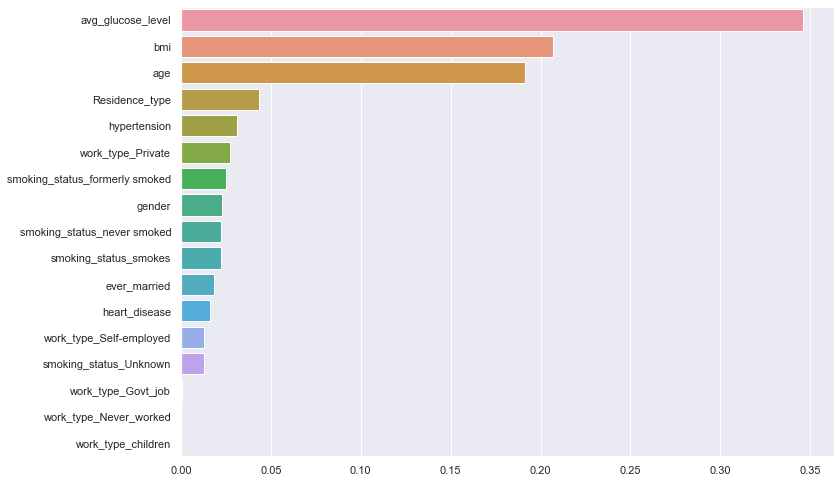

In [486]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion= "gini")

#fit decision tree clasifier
clf = clf.fit(X_train, y_train)

#print feature importances
feature_importances = clf.feature_importances_
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_importances, sorted_feature_names)

### Supervised Learning

##### Drop unnecesary columns

In [487]:
##columns_drop = ["work_type_children", "work_type_Never_worked", "smoking_status_Unknown"]
##X_train = X_train.drop(columns = columns_drop)

##### test data 

In [488]:
##normalise and encode test data
#change to category type
categories = ["gender", "smoking_status", "Residence_type", "work_type"]

for col in categories:
    X_test[col] = X_test[col].astype("category")

####labelencoder

#change yes/no to numbers
from sklearn.preprocessing import LabelEncoder

#create encoder
enconder = LabelEncoder()
columns =  "gender", "hypertension", "heart_disease", "ever_married", "Residence_type"

#create new variable with assigned numbers
for col in columns:
    X_test[col] = enconder.fit_transform(X_test[col])


##### one hot
columns = ['work_type', 'smoking_status']
X_test = pd.get_dummies(X_test, columns= columns, prefix = columns)
X_test.head()

####standardscaler
col_names = ["age", "avg_glucose_level", "bmi"]
features = X_test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_test[col_names] = features


#check data again
#X_test = X_test.drop(columns = columns_drop)

X_test.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
118,0,-0.250173,0,0,0,1,-0.525701,-0.624264,0,0,0,1,0,0,1,0,0
3957,0,-0.250173,0,0,1,1,-0.172983,-0.224566,0,0,0,1,0,0,0,1,0
266,0,-0.073342,0,0,1,0,-0.517152,-0.811622,0,0,1,0,0,0,0,1,0
3348,0,-1.090122,0,0,0,1,-0.592123,-0.674226,0,0,1,0,0,1,0,0,0
3737,0,1.297100,0,0,1,0,-0.165968,-0.174604,0,0,0,1,0,1,0,0,0


In [ ]:
model_comparison = {}

#### SVC

In [506]:
from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


#parameters to evaluate
parameters = {'C': [1,2,3,4,5,6], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_model = SVC(random_state=8)

clf = GridSearchCV(svc_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(X_test)
model_comparison['SVC'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))


Searching for best hyperparameters ...
Best Hyperparameters: {'C': 1, 'kernel': 'linear'}


              precision    recall  f1-score   support

           0      0.955     1.000     0.977      1220
           1      1.000     0.000     0.000        58

    accuracy                          0.955      1278
   macro avg      0.977     0.500     0.488      1278
weighted avg      0.957     0.955     0.932      1278



#### Random Forest Classifier

In [507]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, random_state=0).fit(X_train, y_train)
rfc_predicted = rfc.predict(X_test)
confusion = confusion_matrix(y_test, rfc_predicted)

print('Accuracy of RFC classifier on training set: {:.3f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of RFC classifier on test set: {:.3f}'
     .format(rfc.score(X_test, y_test)))


model_comparison['RFC'] = [accuracy_score(y_test, rfc_predicted), f1_score(y_test, rfc_predicted, average='weighted')]
print('\n')
print(classification_report(y_test,rfc_predicted, zero_division=1, digits=3))



Accuracy of RFC classifier on training set: 0.991
Accuracy of RFC classifier on test set: 0.950


              precision    recall  f1-score   support

           0      0.957     0.992     0.974      1220
           1      0.286     0.069     0.111        58

    accuracy                          0.950      1278
   macro avg      0.621     0.530     0.543      1278
weighted avg      0.927     0.950     0.935      1278



#### Logistic Regression

In [508]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

model_comparison['LR'] = [accuracy_score(y_test, lr_predicted), f1_score(y_test, lr_predicted, average='weighted')]
print('\n')
print(classification_report(y_test,lr_predicted, zero_division=1, digits=3))



              precision    recall  f1-score   support

           0      0.955     0.999     0.977      1220
           1      0.500     0.017     0.033        58

    accuracy                          0.955      1278
   macro avg      0.728     0.508     0.505      1278
weighted avg      0.935     0.955     0.934      1278



##### K-Nearest Neighbors

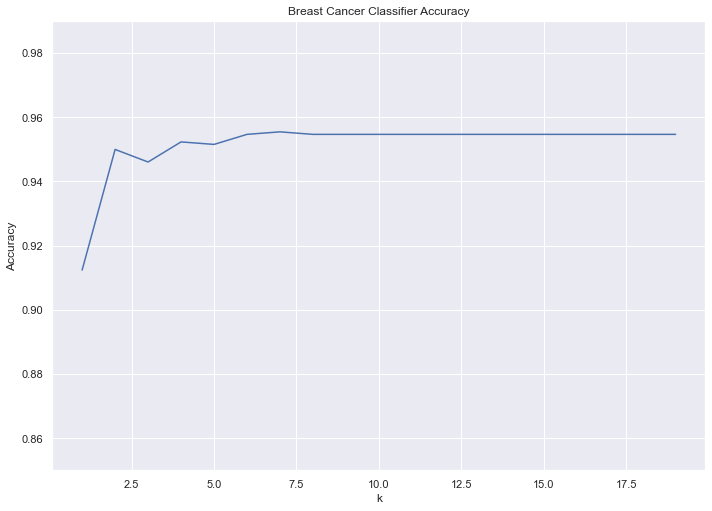

In [511]:
from sklearn.neighbors import KNeighborsClassifier

results = []

for k in range(1,20):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  results.append(classifier.score(X_test, y_test))

k_list = range(1,20)
plt.plot(k_list, results)
plt.ylim(0.85,0.99)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [512]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.3f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.3f}'
     .format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test)

model_comparison['KNN'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))


Accuracy of K-NN classifier on training set: 0.950
Accuracy of K-NN classifier on test set: 0.955


              precision    recall  f1-score   support

           0      0.955     1.000     0.977      1220
           1      1.000     0.000     0.000        58

    accuracy                          0.955      1278
   macro avg      0.977     0.500     0.488      1278
weighted avg      0.957     0.955     0.932      1278



### Decision Tree Classifier

In [513]:
parameters = {'max_depth': [1,2,3,4,5,6]}

dt = DecisionTreeClassifier()

dtc = GridSearchCV(dt, parameters)
print("Searching for best hyperparameters ...")
dtc.fit(X_train, y_train)
print(f'Best Hyperparameters: {dtc.best_params_}')

y_pred = dtc.predict(X_test)
model_comparison['DecisionTreeClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 1}


              precision    recall  f1-score   support

           0      0.955     1.000     0.977      1220
           1      1.000     0.000     0.000        58

    accuracy                          0.955      1278
   macro avg      0.977     0.500     0.488      1278
weighted avg      0.957     0.955     0.932      1278



### XGBoost

In [514]:
import xgboost as xgb

parameters = {'n_estimators': [80, 100, 120], 'max_depth':[16, 18, 20]}

xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

clf = GridSearchCV(xgboost, parameters)
print("Searching for best hyperparameters ...")
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(X_test)
model_comparison['XGBoost'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 16, 'n_estimators': 80}


              precision    recall  f1-score   support

           0      0.957     0.981     0.969      1220
           1      0.148     0.069     0.094        58

    accuracy                          0.940      1278
   macro avg      0.552     0.525     0.531      1278
weighted avg      0.920     0.940     0.929      1278



## Model Comparison

In [515]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ['Accuracy', 'F1 Score']
model_comparison_df = model_comparison_df.sort_values('F1 Score', ascending=True)
model_comparison_df.style.background_gradient(cmap='RdBu_r')

,Accuracy,F1 Score
XGBoost,0.939750,0.929141
SVC,0.954617,0.932452
KNN,0.954617,0.932452
DecisionTreeClassifier,0.954617,0.932452
LR,0.954617,0.933947
RFC,0.949922,0.935064
